In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler

In [10]:
# To load df
combined_selected_filled = pd.read_csv(r'C:\Users\Tombra\Vancouver_Weather_Predictions\combined_selected_filled.csv')

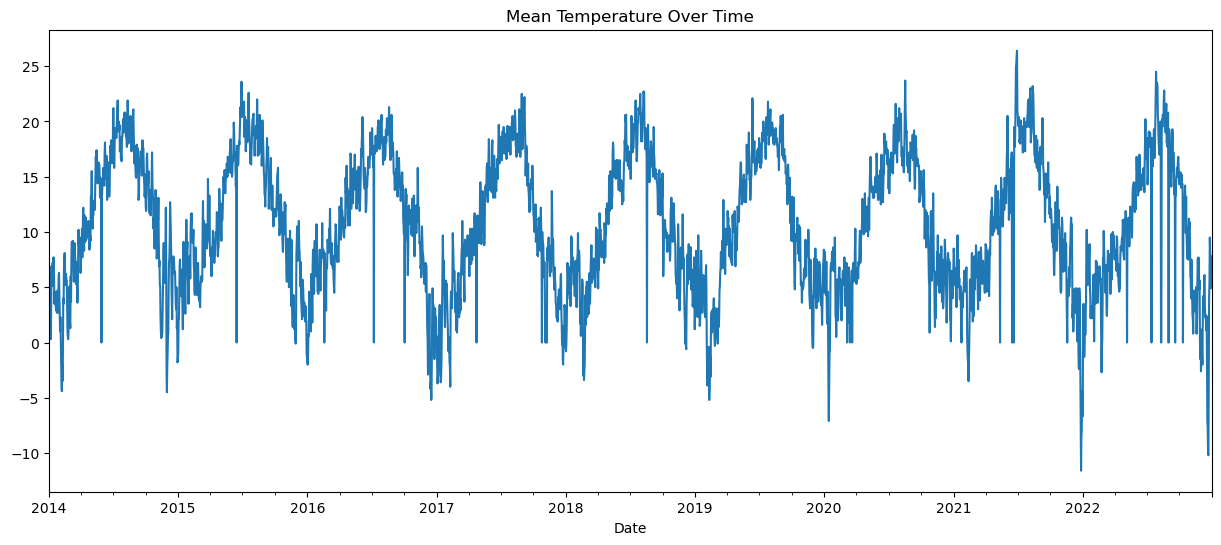

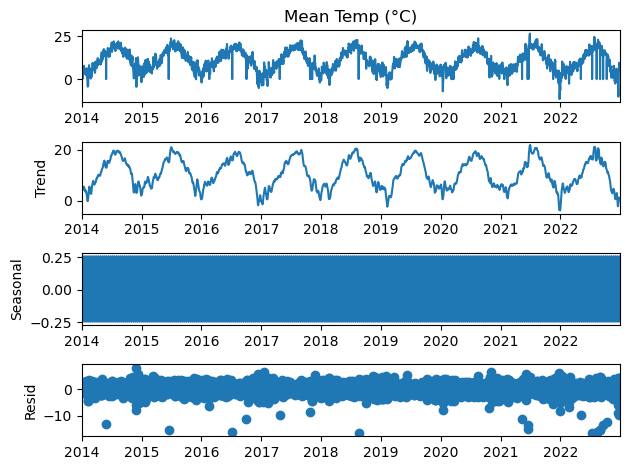

c:\Users\Tombra\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


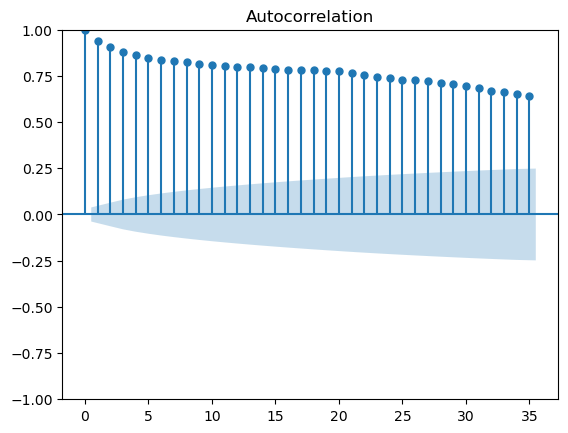

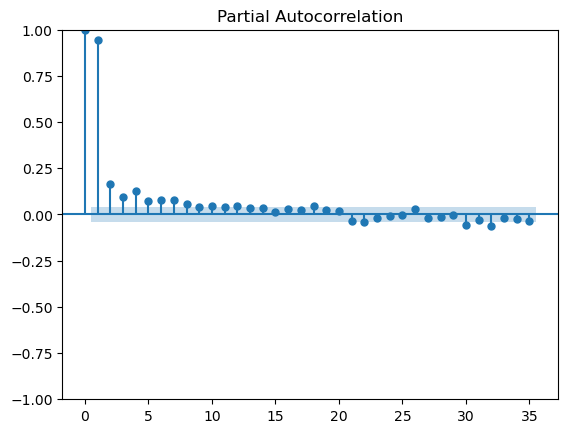

c:\Users\Tombra\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Root Mean Squared Error (RMSE): 7.8793886480810515


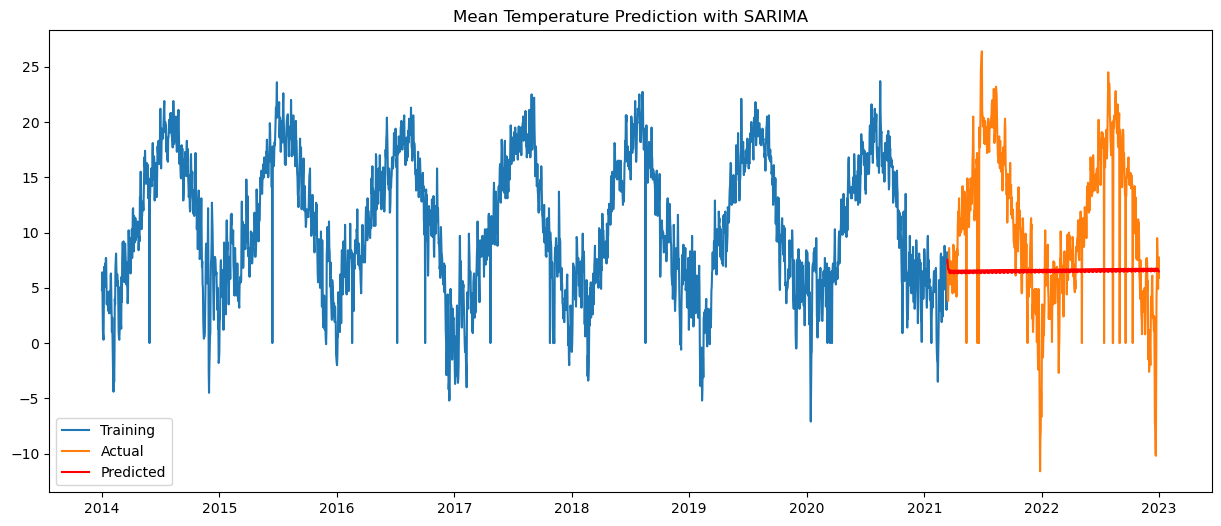

In [8]:
#get a time series model to determine the mean temperature in the year 2023
# Combine date columns into a single datetime column
combined_selected_filled['Date'] = pd.to_datetime(combined_selected_filled[['Year', 'Month', 'Day']])

# Set the date as the index
combined_selected_filled.set_index('Date', inplace=True)

# Plot the time series data
combined_selected_filled['Mean Temp (°C)'].plot(figsize=(15, 6))
plt.title('Mean Temperature Over Time')
plt.show()


# Decompose the time series to understand trends, seasonality, and residuals
result = seasonal_decompose(combined_selected_filled['Mean Temp (°C)'], model='additive', period=12)
result.plot()
plt.show()

# Split the data into training and testing sets
train_size = int(len(combined_selected_filled) * 0.8)
train, test = combined_selected_filled[:train_size], combined_selected_filled[train_size:]

# Plot autocorrelation and partial autocorrelation to determine the order of the SARIMA model
plot_acf(train['Mean Temp (°C)'])
plot_pacf(train['Mean Temp (°C)'])
plt.show()

# Use MinMaxScaler to scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[['Mean Temp (°C)']])
test_scaled = scaler.transform(test[['Mean Temp (°C)']])

# Fit a SARIMA model

order = (1, 1, 1)  # Example order, tune this based on ACF and PACF plots
model = SARIMAX(train_scaled, order=order, seasonal_order=(1, 1, 1, 12))
fit_model = model.fit()

# Predict on the test set
predictions = fit_model.get_forecast(steps=len(test_scaled))
predicted_mean = predictions.predicted_mean

# Inverse transform the predictions to the original scale
predicted_mean_original_scale = scaler.inverse_transform(np.array(predicted_mean).reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Mean Temp (°C)'], predicted_mean_original_scale))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(train['Mean Temp (°C)'], label='Training')
plt.plot(test['Mean Temp (°C)'], label='Actual')
plt.plot(test.index, predicted_mean_original_scale, label='Predicted', color='red')
plt.title('Mean Temperature Prediction with SARIMA')
plt.legend()
plt.show()
